## FIN 580 Homework 3 - Tejas Dhomne | UIN - 661586178

### 1. Import pandas_datareader as pdr

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

In [2]:
x=['GOOGL','^GSPC']

In [3]:
df1 = pdr.get_data_yahoo(x, start='2018-01-01',end='2020-12-31')["Adj Close"]
df1

Symbols,GOOGL,^GSPC
Date,,
2018-01-02,53.660500,2695.810059
2018-01-03,54.576000,2713.060059
2018-01-04,54.787998,2723.989990
2018-01-05,55.514500,2743.149902
2018-01-08,55.710499,2747.709961
...,...,...
2020-12-24,86.708000,3703.060059
2020-12-28,88.697998,3735.360107
2020-12-29,87.888000,3727.040039


### 1.1  Create two columns in df1 named year and quarter that extract year and quarter information from the Date index column.

In [4]:
df1['year']=df1.index.year
df1['quarter']=df1.index.quarter
df1['return']=df1['^GSPC'].pct_change()
df1['return_GOOGL']=df1['GOOGL'].pct_change()
df1.dropna(how="any",inplace=True)
df1

Symbols,GOOGL,^GSPC,year,quarter,return,return_GOOGL
Date,,,,,,
2018-01-03,54.576000,2713.060059,2018,1,0.006399,0.017061
2018-01-04,54.787998,2723.989990,2018,1,0.004029,0.003884
2018-01-05,55.514500,2743.149902,2018,1,0.007034,0.013260
2018-01-08,55.710499,2747.709961,2018,1,0.001662,0.003531
2018-01-09,55.639500,2751.290039,2018,1,0.001303,-0.001274
...,...,...,...,...,...,...
2020-12-24,86.708000,3703.060059,2020,4,0.003537,0.003431
2020-12-28,88.697998,3735.360107,2020,4,0.008723,0.022951
2020-12-29,87.888000,3727.040039,2020,4,-0.002227,-0.009132


### 1.2  Create two columns in df1 named year and quarter that extract year and quarter information from the Date index column.

In [5]:
df1.loc[(df1["year"]==2018),"GOOGL"][:1]


Date
2018-01-03    54.576
Name: GOOGL, dtype: float64

In [6]:
df1.loc[(df1["year"]==2018),"^GSPC"][:1]

Date
2018-01-03    2713.060059
Name: ^GSPC, dtype: float64

In [7]:
idx_market_price=df1['^GSPC']
idx_google_price=df1['GOOGL']

In [8]:
df1['nprice_market']=idx_market_price/idx_market_price[0]*100
df1['nprice_GOOGL']=idx_google_price/idx_google_price[0]*100
df1

Symbols,GOOGL,^GSPC,year,quarter,return,return_GOOGL,nprice_market,nprice_GOOGL
Date,,,,,,,,
2018-01-03,54.576000,2713.060059,2018,1,0.006399,0.017061,100.000000,100.000000
2018-01-04,54.787998,2723.989990,2018,1,0.004029,0.003884,100.402864,100.388445
2018-01-05,55.514500,2743.149902,2018,1,0.007034,0.013260,101.109074,101.719619
2018-01-08,55.710499,2747.709961,2018,1,0.001662,0.003531,101.277152,102.078750
2018-01-09,55.639500,2751.290039,2018,1,0.001303,-0.001274,101.409109,101.948658
...,...,...,...,...,...,...,...,...
2020-12-24,86.708000,3703.060059,2020,4,0.003537,0.003431,136.490162,158.875696
2020-12-28,88.697998,3735.360107,2020,4,0.008723,0.022951,137.680701,162.521983
2020-12-29,87.888000,3727.040039,2020,4,-0.002227,-0.009132,137.374034,161.037819


### 1.3 Import matplotlib.pyplot as plt. Use pandas visualization to create the following line plot of the normalized prices.

In [9]:
import matplotlib.pyplot as plt

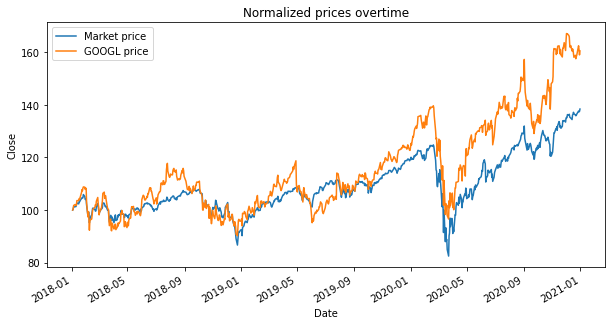

In [10]:
df1[['nprice_market','nprice_GOOGL']].plot(figsize = (10,5))
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Normalized prices overtime")
plt.legend(["Market price","GOOGL price"]);

### 1.4 Import matplotlib.pyplot as plt. Use pandas visualization to create the following line plot of the normalized prices.

In [11]:
df1.loc[df1["year"]==2020,"GOOGL"].max()

91.24849700927734

In [12]:
df1.loc[df1["year"]==2020,"GOOGL"].idxmax()

Timestamp('2020-12-02 00:00:00')

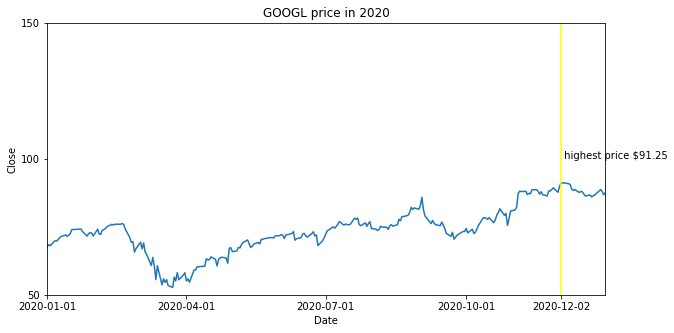

In [13]:
plt.figure(figsize = (10, 5))
plt.plot(df1['GOOGL'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("GOOGL price in 2020")
plt.xlim(pd.to_datetime("2020-01-01"),pd.to_datetime("2020-12-31"))
plt.ylim(50,150)
plt.xticks([pd.to_datetime("2020-01-01"),pd.to_datetime("2020-04-01"),pd.to_datetime("2020-07-01"),pd.to_datetime("2020-10-01"),pd.to_datetime("2020-12-02")])
plt.yticks([50,100,150])
plt.axvline(pd.to_datetime("2020-12-02"), color='yellow')
plt.text(pd.to_datetime("2020-12-02"),100," highest price $91.25");

### 1.5 Use the matplotlib object-oriented interface to create the following line plot of the market price and the price of GOOGL with difference y-axis scales. 

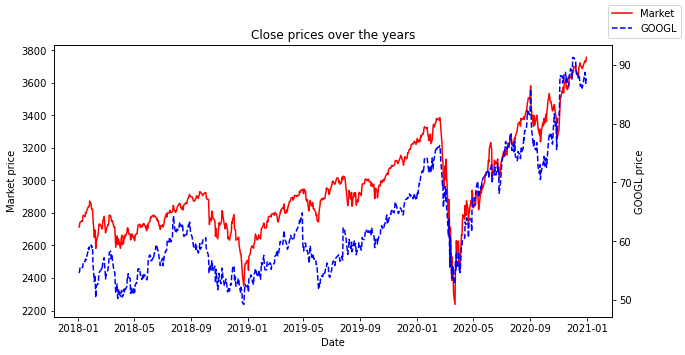

In [14]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(df1["^GSPC"],color="red",linestyle="-",label="Market")
ax1.set_ylabel("Market price")
ax1.set_xlabel("Date")

ax2 = ax1.twinx() 
ax2.plot(df1["GOOGL"],color="blue", linestyle="--",label="GOOGL")
ax2.set_ylabel("GOOGL price")
ax2.set_title('Close prices over the years')
fig.legend(["Market", "GOOGL"]);

### 1.6 Use groupby(), mean(), unstack(), and mul() to group df1 by the quarter and year columns, calculate the average value of GOOGL’s return in the return_GOOGL column for each group, unstack the second index level, and multiply the numbers by 100. Save the result in a DataFrame named df2. 

In [15]:
df2=df1.groupby(["quarter","year"]).mean()['return_GOOGL'].unstack(1).mul(100)
df2

year,2018,2019,2020
quarter,,,
1,-0.037352,0.205808,-0.169978
2,0.143397,-0.117663,0.344716
3,0.113487,0.202507,0.066761
4,-0.203295,0.148799,0.295098


### 1.7 Use pandas visualization to create the following bar plot of quarterly returns of GOOGL.

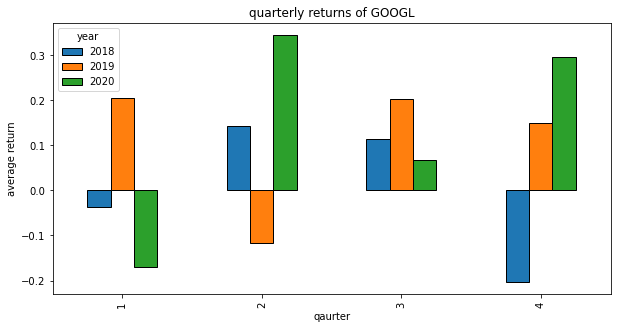

In [16]:
df2.plot(kind="bar",figsize = (10,5), edgecolor='black')
plt.xlabel('qaurter')
plt.ylabel('average return')
plt.title('quarterly returns of GOOGL');

### 1.8 Use the matplotlib function-oriented interface to create the following scatter plot of GOOGL’s returns and market returns.

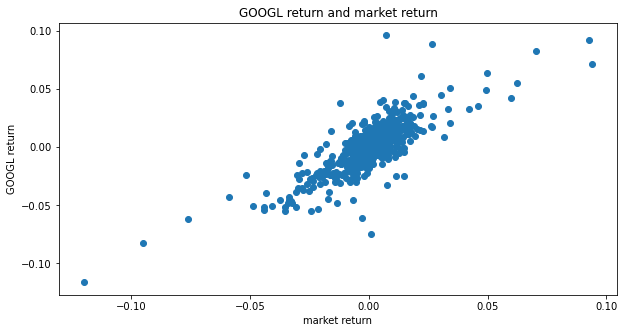

In [17]:
plt.figure(figsize = (10, 5))
plt.scatter(x=df1["return"],y=df1["return_GOOGL"])
plt.xlabel('market return')
plt.ylabel('GOOGL return')
plt.title('GOOGL return and market return');